In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# 第二章 第21题
给出生成密度函数为：
$$p(x)=xe^{-x},x>0$$
的随机数的两种方法并比较效率

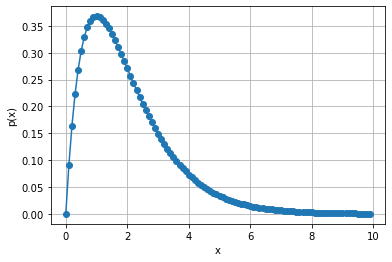

In [2]:
"""该密度函数在0-10的形状"""
x = np.arange(0, 10, 0.1)
p = x * np.exp(-x)
plt.plot(x, p,'o-')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)#显示轴网格线

## 第一种方法：逆变换法

In [3]:
'''
通过构造2个指数分布的随机数来合成gamma分布：
    通过逆变换法生成指数分布随机数
'''
def rand_gamma_1(num):
    start_time = time.time()
    U_1 = np.random.rand(num)
    U_2 = np.random.rand(num)
    rand_gamma_1 = - np.log(U_1 * U_2)
    end_time = time.time()
    gamma_time_1 = end_time - start_time
    
    return rand_gamma_1, gamma_time_1

rand_gamma_1(100000) # 生成100000个gamma分布随机数，耗时0.003988981246948242

(array([1.68524552, 4.26990381, 4.76987237, ..., 3.04864918, 1.1072809 ,
        2.91822361]),
 0.003991365432739258)

(array([[1.156e+03, 2.142e+03, 1.934e+03, 1.567e+03, 1.135e+03, 7.630e+02,
         5.000e+02, 3.050e+02, 1.880e+02, 1.220e+02, 6.600e+01, 5.000e+01,
         3.000e+01, 2.000e+01, 7.000e+00, 8.000e+00, 0.000e+00, 3.000e+00,
         1.000e+00, 3.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00]]),
 array([1.09863281e-03, 5.85317966e-01, 1.16953730e+00, 1.75375663e+00,
        2.33797596e+00, 2.92219530e+00, 3.50641463e+00, 4.09063396e+00,
        4.67485330e+00, 5.25907263e+00, 5.84329196e+00, 6.42751129e+00,
        7.01173063e+00, 7.59594996e+00, 8.18016929e+00, 8.76438862e+00,
        9.34860796e+00, 9.93282729e+00, 1.05170466e+01, 1.11012660e+01,
        1.16854853e+01]),
 <a list of 2 BarContainer objects>)

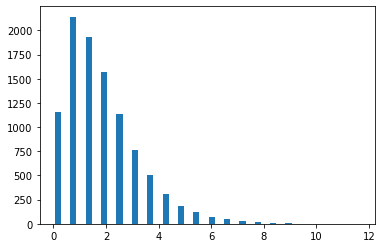

In [4]:
pillar = 20
rand_1 = rand_gamma_1(10000)
plt.hist(rand_1,bins = pillar)

## 第二种方法：舍选法Ⅱ

In [5]:
'''
生成两组均匀分布的随机数，一组用于判断，一组用于生成随机数
'''
def rand_gamma_2(num):
    start_time = time.time()
    rand_gamma_2 = np.array([])
    for i in range(num):
        Y = 1
        v = 0
        while(Y > v):
            U_1 = np.random.rand()
            U_2 = np.random.rand()
            X = -2 * np.log(U_1)
            Y = U_2
            v = (2 * X * np.exp(- X / 2)) / ( 4 * np.exp(-1))
        rand_gamma_2 = np.append(rand_gamma_2, X)
    end_time = time.time()
    gamma_2_time = end_time - start_time
    return rand_gamma_2, gamma_2_time

rand_gamma_2(100000) # 生成100000个gamma分布随机数，耗时3.358640670776367

(array([0.41879048, 2.40331226, 2.89389335, ..., 1.0933189 , 2.27821889,
        1.44476629]),
 3.2949016094207764)

(array([[1.325e+03, 2.206e+03, 1.938e+03, 1.552e+03, 1.063e+03, 7.240e+02,
         4.450e+02, 2.800e+02, 1.900e+02, 1.150e+02, 7.100e+01, 4.200e+01,
         2.200e+01, 1.000e+01, 6.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
         0.000e+00, 2.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00]]),
 array([ 0.0178972 ,  0.62950588,  1.24111456,  1.85272324,  2.46433191,
         3.07594059,  3.68754927,  4.29915795,  4.91076663,  5.52237531,
         6.13398398,  6.74559266,  7.35720134,  7.96881002,  8.5804187 ,
         9.19202738,  9.80363605, 10.41524473, 11.02685341, 11.63846209,
        12.25007077]),
 <a list of 2 BarContainer objects>)

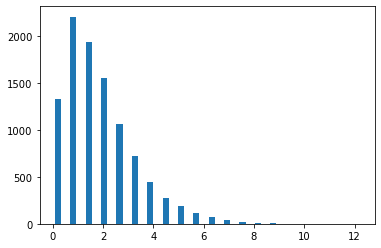

In [6]:
pillar = 20
rand_1 = rand_gamma_2(10000)
plt.hist(rand_1,bins = pillar)

可见逆变换法效率远高于舍选法

# 第三章 第5题
设$X\sim N(0,1)$,则$\theta=P(X>4.5)=3.398\times10^{-6}$.
1. 如果直接生成$N$个$X$的随机数，用$X_i>4.5$的比例估计$P(X>4.5)$，平均多少个样本点中才能有一个样本点满足$X_i>4.5$?
2. 取$V$为指数分布EXP(1),令$W=V+4.5$，用$W$的样本进行重要抽样估计$\theta$取样本点个数$N=1000$，求估计值并估计误差大小。

In [7]:
'''
    1.
    根据概率，平均3.398 * 10^6个样本点中才能有一个样本点满足大于4.5
    生成10000000个标准正态随机数，只有36个大于4.5；
'''
X = np.random.normal(0, 1, 10000000)
X_t = X[X > 4.5]
len(X_t)

31

In [8]:
'''
    2.重要抽样法
    
'''
U = np.random.rand(1000)
x = 4.5 - np.log(U)
y = np.exp(-0.5 * x * x + x - 4.5) / np.sqrt(2 * np.pi)
y_mean = np.mean(y)
print("估计值为：{}\n估计误差为：{}%".format(y_mean,abs((3.398e-06-y_mean)/3.398e-06)*100))

估计值为：3.631561899987467e-06
估计误差为：6.873510888389256%


# 第三章 第9题
用随机模拟法计算二重积分$\int_0^1\int_0^1e^{(x+y)^2}dydx$,用对立变量法改善精度。

## 平均值法

In [9]:
nums = 10
X = np.random.random(nums)
Y = np.random.random(nums)
np.exp((X + Y)**2)

array([ 1.30368399,  1.96889069,  1.2180909 , 38.1050551 ,  3.96782451,
        1.00570254,  2.61630045,  4.78326512,  6.96033027,  6.32648705])

In [10]:
'''
    在(0,1)*(0,1)上对exp((x + y)^2)用平均值法
'''
def mean_estimate(nums):
    '''使用nums个随机数模拟积分'''
    X = np.random.random(nums)
    Y = np.random.random(nums)
    h = np.exp((X + Y) ** 2)
    return np.mean(h)

mean_estimate(10000)

'''
    模拟100次，取平均值和方差
'''
mean_estimate_all = np.array([])
for i in range(10000):
    a = mean_estimate(100)
    mean_estimate_all = np.append(mean_estimate_all, a)

mean_all = np.mean(mean_estimate_all)
var_all = np.var(mean_estimate_all, ddof = 1)
print('10000次模拟的平均值为：%f\n方差为：%f'%(mean_all, var_all))

10000次模拟的平均值为：4.898138
方差为：0.356427


## 对立变量法

In [11]:
def op_estimate(nums):
    """使用nums个随机数来模拟积分"""
    X = np.random.random(nums)
    Y = np.random.random(nums)
    h_1 = np.exp((X + Y) ** 2)
    h_2 = np.exp(((1 - X) + (1 - Y)) ** 2)
    h = (h_1 + h_2) / 2
    return np.mean(h)

op_estimate(10000)

'''
    模拟100次，取平均值和方差
'''
op_estimate_all = np.array([])
for i in range(10000):
    a = op_estimate(100)
    op_estimate_all = np.append(op_estimate_all, a)

mean_all = np.mean(op_estimate_all)
var_all = np.var(op_estimate_all, ddof = 1)
print('10000次模拟的平均值为：%f\n方差为：%f'%(mean_all, var_all))

10000次模拟的平均值为：4.900972
方差为：0.113929


可见控制变量法使方差降低很多，精度提高

# 第三章 第13题
设计模拟如下离散事件的算法。设某商场每天开放$L_0$时间，有小偷在该商场出没，小偷的出现服从强度为$\lambda_1$的齐次Poisson过程，出现后作案$X$时间后离开，设$X$服从对数正态分布，$lnX\sim N(\mu_2,\sigma_2^2)$.设有一个警察每隔$L_3$时间在商场巡逻$Y$时间。$Y$服从$EXP(\lambda_2)$分布，只要小偷和警察同时出现在商场内小偷就会被抓获。模拟估计一天时间内有小偷被抓获的概率。

In [12]:
import random

In [13]:
def prob_catch_day(L_0 = 12, lambda_1 = 1, mu = 0, sigma = 1, L_3 = 0.5, lambda_2 = 1, T = 12, nums = 1000):
    '''
    输入：
        L_0:一天之中商场开放的时间
        lambda_1:小偷出现服从的poisson过程的参数【时间间隔的参数】
        mu, sigma:作案时间服从的对数正态分布
        L_3:警察巡逻的时间间隔
        lambda_2:警察巡逻时间服从的指数分布的参数
        nums:模拟次数
    输出：
        这一天中小偷被抓获的概率
        
    备注：
        t时间内事件发生的次数N(t)=n服从Poisson(\lambda * t)
    '''
    start_time_thief = 0 # 小偷开始偷东西的时间
    start_time_police = 0 # 警察开始巡逻时间
    people = 0 # 未被捕人数
    while T - start_time_thief > 0:
        end_time_thief = start_time_thief + random.lognormvariate(mu, sigma) # 小偷结束偷东西的时间（对数正态分布）
        start_time_police = start_time_police + L_3 #警察开始巡逻的时间——每次巡逻间隔L_3时间
        end_time_police = start_time_police + random.expovariate(lambda_2) # 警察结束巡逻时间——指数分布
        
        # 计算成功偷窃的人数
        if end_time_police < start_time_thief or start_time_police > end_time_thief:
            people += 1 #未被捕获的人数加1
        start_time_thief = end_time_police
        start_time_police = end_time_police
        
    N_T = np.random.poisson(lambda_1 * T) # T内发生偷窃总次数
    N_catch = N_T - people
    prob_catch_T = N_catch / N_T
    
    return prob_catch_T

In [14]:
"""模拟10000次来估计小偷被抓住的概率"""
prob_catch = 0

for i in range(10000):
    prob_catch += prob_catch_day()

prob_catch = prob_catch / 10000
    
print('一天时间内有小偷被抓获的概率为%f'%prob_catch)

一天时间内有小偷被抓获的概率为0.802466
